# How many commits did the other contributors make?

In [2]:
import requests
import pandas as pd

url= 'https://api.github.com/repos/d3/d3/stats/contributors'
r = requests.get(url)

cols = ['author_id', 'total_commits']
df = pd.DataFrame(columns=cols)
for i, x in enumerate(r.json()):
    df.loc[i,:] = x['author']['login'], x['total']

print "There are "+ str(len(df)) +" contributors including owner 'mbostock' "

mbostock_commits = df[df['author_id']=='mbostock']['total_commits'][0]
print mbostock_commits

print df[df['total_commits']>10]

There are 100 contributors including owner 'mbostock' 
       author_id total_commits
93        natevw            11
94  larskotthoff            11
95        yasirs            11
96      27359794            24
97    kitmonisit            50
98   jasondavies           755
99      mbostock          2319


In [6]:
mbostock_commits = df[df['author_id']=='mbostock']['total_commits'].values[0]
print "Owner mbostock made "+str(mbostock_commits)+" commmits."


Owner mbostock made 2319 commmits.


In [11]:
print df[df['total_commits']>10]

jasondavies_commits = df[df['author_id']=='jasondavies']['total_commits'].values[0]


       author_id total_commits
93        natevw            11
94  larskotthoff            11
95        yasirs            11
96      27359794            24
97    kitmonisit            50
98   jasondavies           755
99      mbostock          2319


Aside from the owner, there are only 6 other contributors with over 10 total commits. Contributor 'jasondavies' notably had 755, by far the most of the contributors. 

In [9]:
filter_authors = [a for a in df['author_id'] if a not in ['jasondavies','mbostock']]
other_contrib_commmitstotal = df[df['author_id'].isin(filter_authors)]['total_commits'].sum()
print other_contrib_commmitstotal

323


Contributor jasondavies had more than double than the total commits of the other contributors combined.

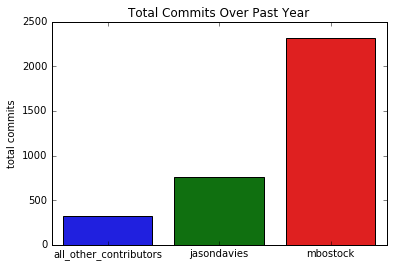

In [13]:
%matplotlib inline
import sys
import os
sys.path.append(os.path.expanduser('~/anaconda/lib/python2.7/site-packages'))
import seaborn as sns

cols = ['all_other_contributors','jasondavies','mbostock']
df = pd.Series(index=cols)
df['all_other_contributors'] = other_contrib_commmitstotal
df['jasondavies'] = jasondavies_commits
df['mbostock'] = mbostock_commits

ax = sns.barplot(x = df.index, y= df.values)
ax.set_ylabel('total commits')
ax.set_title('Total Commits Over Past Year')